In [1]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import yfinance as yahooFinance
import pandas as pd
import numpy as np

In [2]:
stock_name = '^NSEI'

stockInfo = yahooFinance.Ticker(stock_name)

pd.set_option('expand_frame_repr', False)

start = '2007-01-01'
end = '2024-12-01'

data = stockInfo.history(period="max", interval="1d", start=start, end=end)

In [3]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-25 00:00:00+05:30,24253.550781,24351.550781,24135.449219,24221.900391,687200,0.0,0.0
2024-11-26 00:00:00+05:30,24343.300781,24343.300781,24125.400391,24194.500000,230700,0.0,0.0
2024-11-27 00:00:00+05:30,24204.800781,24354.550781,24145.650391,24274.900391,295000,0.0,0.0


In [4]:
# defining x and y 
x = data.index
y = data['Close']
y

Date
2007-09-17 00:00:00+05:30     4494.649902
2007-09-18 00:00:00+05:30     4546.200195
2007-09-19 00:00:00+05:30     4732.350098
2007-09-20 00:00:00+05:30     4747.549805
2007-09-21 00:00:00+05:30     4837.549805
                                 ...     
2024-11-25 00:00:00+05:30    24221.900391
2024-11-26 00:00:00+05:30    24194.500000
2024-11-27 00:00:00+05:30    24274.900391
2024-11-28 00:00:00+05:30    23914.150391
2024-11-29 00:00:00+05:30    24131.099609
Name: Close, Length: 4217, dtype: float64

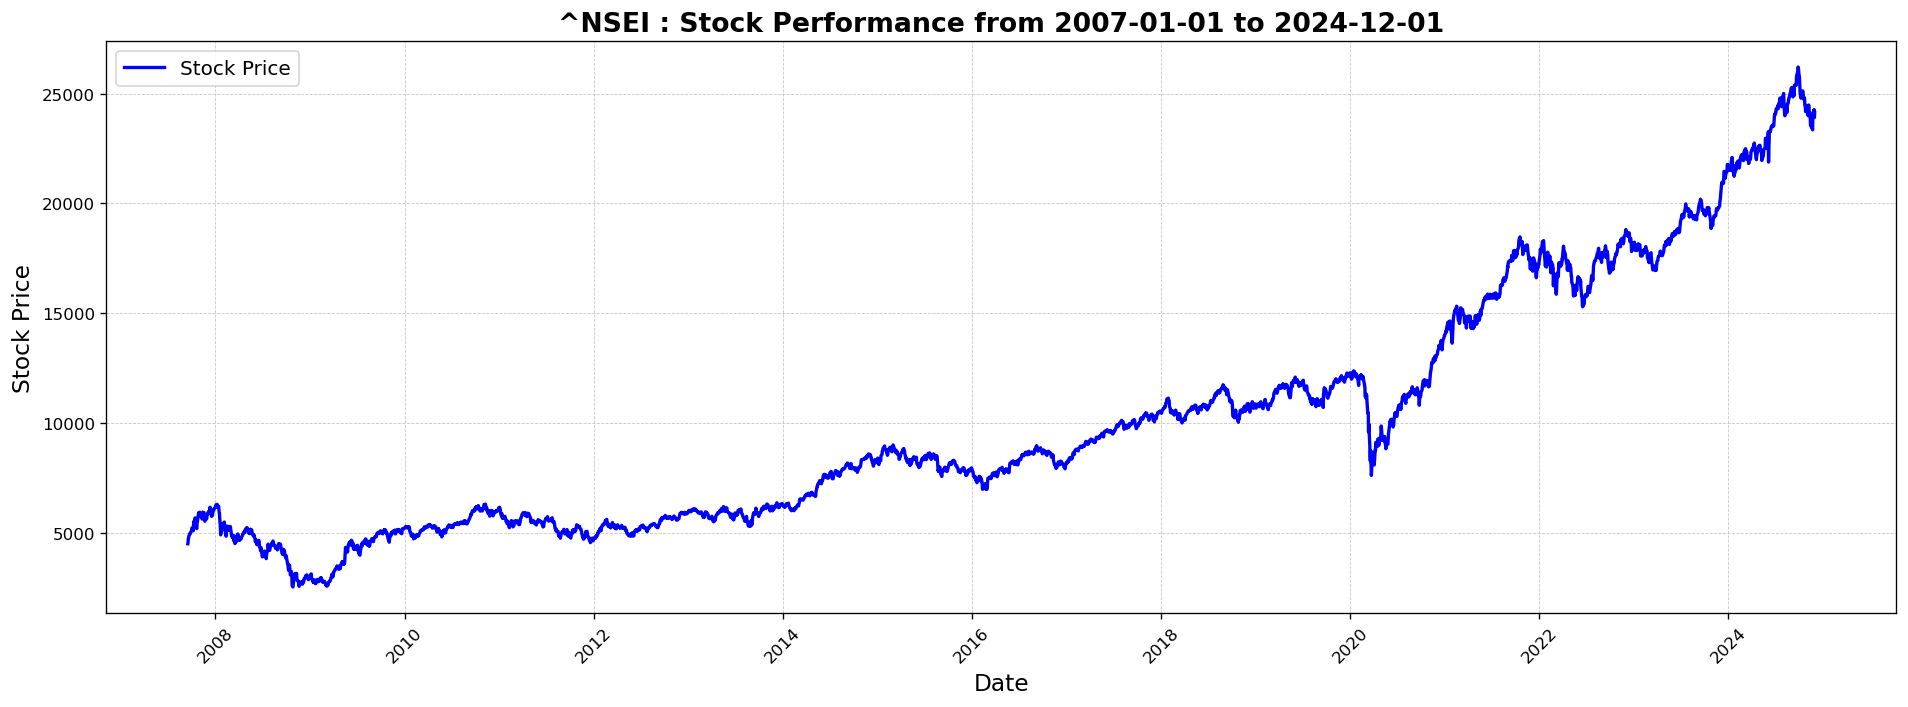

In [5]:
title = (f"{stock_name} : Stock Performance from {start} to {end}")

# Create the figure with improved size and resolution
plt.figure(figsize=(16, 6), dpi=120)

# Plot the data with a clear line style and color
plt.plot(x, y, label='Stock Price', color='blue', linestyle='-', linewidth=2)

# Add grid for better readability
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Set title and labels with larger, readable font sizes
plt.title(title, fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)

# Rotate the x-axis labels for better spacing if dates are dense
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add a legend to explain the plotted line
plt.legend(fontsize=12, loc='upper left')

# Automatically adjust layout to prevent overlapping text
plt.tight_layout()

plt.savefig(f"{stock_name}_performance_from_{start}_to_{end}")

# Display the plot
plt.show()

In [6]:
# Data Processing and scaling
data.reset_index(inplace=True) # to reset index and convert it to column

In [7]:
data.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
1,2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0


In [8]:
data.drop(columns=['Dividends', 'Stock Splits']).head(2)

,Date,Open,High,Low,Close,Volume
0,2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0
1,2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0


In [9]:
data['date'] = pd.to_datetime(data.Date)
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4217.000000,4217.000000,4217.000000,4217.000000,4.217000e+03,4217.0,4217.0
mean,10047.715439,10102.124249,9977.603255,10041.256867,2.049589e+05,0.0,0.0
std,5476.525700,5491.171472,5453.641594,5473.208595,2.088488e+05,0.0,0.0
min,2553.600098,2585.300049,2252.750000,2524.199951,0.000000e+00,0.0,0.0
25%,5582.500000,5625.750000,5545.200195,5576.950195,0.000000e+00,0.0,0.0
50%,8439.200195,8481.599609,8380.549805,8433.650391,1.779000e+05,0.0,0.0
75%,12052.650391,12098.150391,11966.049805,12031.500000,2.859000e+05,0.0,0.0
max,26248.250000,26277.349609,26151.400391,26216.050781,1.811000e+06,0.0,0.0


In [10]:
data.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
0,2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0,2007-09-17 00:00:00+05:30
1,2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0,2007-09-18 00:00:00+05:30


In [11]:
x = data[['Open', 'High','Low', 'Volume']]
y = data['Close']

In [12]:
# Linear regression Model for stock prediction 

test_size = 1

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=test_size / 100 , shuffle=False,random_state = 0)

In [13]:
# let's check if total observation makes sense
print(train_x.shape )
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(4174, 4)
(43, 4)
(4174,)
(43,)


In [14]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("regression coefficient",regression.coef_)
print("regression intercept",regression.intercept_)

regression coefficient [-6.27110665e-01  9.10899881e-01  7.16400884e-01 -1.24874230e-06]
regression intercept -6.95882199600419


In [15]:
# the coefficient of determination R² 
regression_confidence = regression.score(test_x, test_y)
print("linear regression confidence: ", regression_confidence)

linear regression confidence:  0.9779842001401334


In [16]:
predicted=regression.predict(test_x)
print(test_x.head())

              Open          High           Low  Volume
4174  26248.250000  26277.349609  26151.400391  490300
4175  26061.300781  26134.699219  25794.099609  343100
4176  25788.449219  25907.599609  25739.199219  247400
4177  25452.849609  25639.449219  25230.300781  423400
4178  25181.900391  25485.050781  24966.800781  374900


In [17]:
predicted.shape

(43,)

In [18]:
dfr=pd.DataFrame({'Actual_Price':test_y, 'Predicted_Price':predicted})
dfr

,Actual_Price,Predicted_Price
4174,26178.949219,26202.792397
4175,25810.849609,25934.303242
4176,25796.900391,25859.335176
4177,25250.099609,25460.740042
4178,25014.599609,25301.302599
4179,24795.750000,24855.876985
4180,25013.150391,24968.458717
4181,24981.949219,25131.894925
4182,24998.449219,25062.768260
4183,24964.250000,24975.570802


In [19]:
dfr.describe()

,Actual_Price,Predicted_Price
count,43.000000,43.000000
mean,24479.387173,24527.091019
std,633.909737,648.365088
min,23349.900391,23341.198311
25%,24144.750000,24164.339431
50%,24340.849609,24385.140121
75%,24967.775391,24972.014759
max,26178.949219,26202.792397


In [20]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_y, predicted))
print('Mean Squared Error (MSE) :', metrics.mean_squared_error(test_y, predicted))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(test_y, predicted)))

Mean Absolute Error (MAE): 70.3500003458067
Mean Squared Error (MSE) : 8641.122243021679
Root Mean Squared Error (RMSE): 92.95763681926127


In [21]:
dfr.describe()

,Actual_Price,Predicted_Price
count,43.000000,43.000000
mean,24479.387173,24527.091019
std,633.909737,648.365088
min,23349.900391,23341.198311
25%,24144.750000,24164.339431
50%,24340.849609,24385.140121
75%,24967.775391,24972.014759
max,26178.949219,26202.792397


In [22]:
x2 = dfr.Actual_Price.mean()
y2 = dfr.Predicted_Price.mean()
Accuracy1 = x2/y2*100
print("The accuracy of the model is " , Accuracy1)

The accuracy of the model is  99.80550548854052


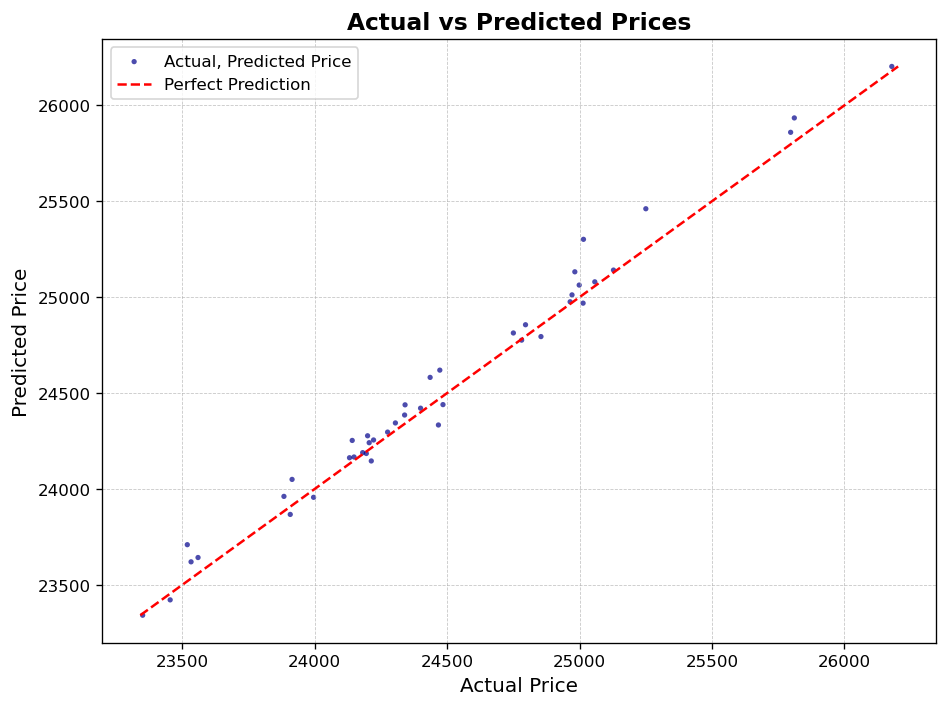

In [23]:
# Create the figure with appropriate size and resolution
plt.figure(figsize=(8, 6), dpi=120)

# Plot the scatter plot with improved marker size and transparency
plt.scatter(
    dfr.Actual_Price, 
    dfr.Predicted_Price, 
    color='darkblue', 
    s=10,  # Adjusted size for better visibility
    alpha=0.7,  # Added transparency for overlapping points
    edgecolor='none',  # No edge color for cleaner appearance
    label='Actual, Predicted Price'
)

# Add a diagonal line to indicate perfect predictions
max_value = max(max(dfr.Actual_Price), max(dfr.Predicted_Price))
min_value = min(min(dfr.Actual_Price), min(dfr.Predicted_Price))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', linewidth=1.5, label='Perfect Prediction')

# Set axis labels with larger, more readable font sizes
plt.xlabel("Actual Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)

# Add grid for better visual alignment
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend to describe the diagonal line
plt.legend(fontsize=10, loc='upper left')

# Add a title for context
plt.title("Actual vs Predicted Prices", fontsize=14, fontweight='bold')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

plt.savefig(f"{stock_name}_{test_size}_scatter_actual_vs_predicte")

# Display the plot
plt.show()

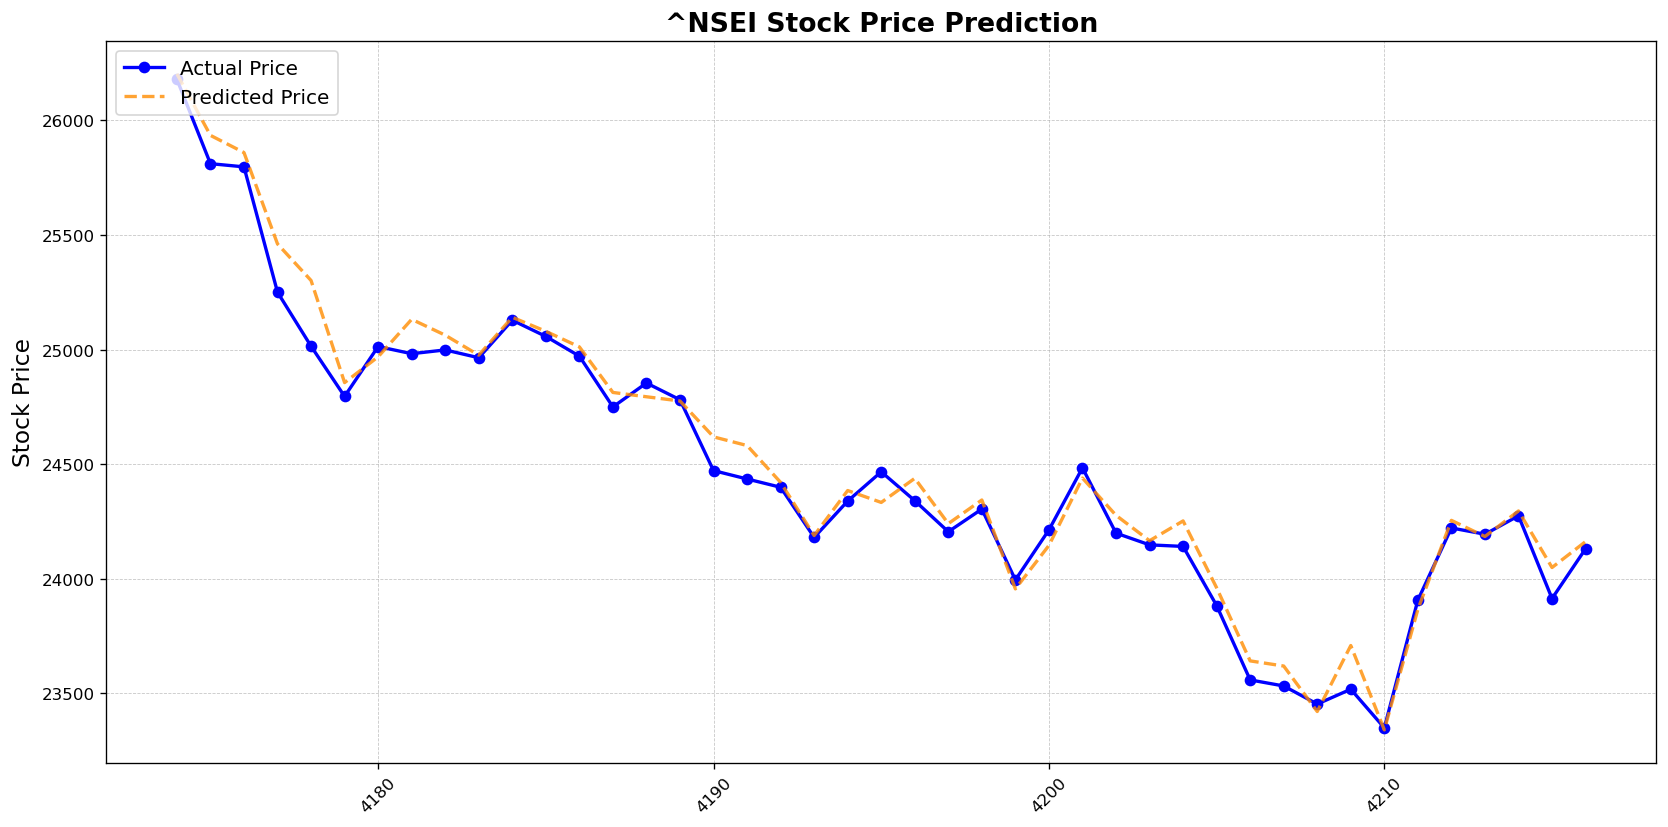

In [50]:
# Create the figure with optimized size and resolution
plt.figure(figsize=(14, 7), dpi=120)

# Plot Actual Prices with distinct style
plt.plot(
    dfr.index,  # Ensure proper x-axis values if dfr has a DateTime index
    dfr.Actual_Price, 
    marker='o', 
    color='blue', 
    linestyle='-', 
    linewidth=2, 
    label="Actual Price"
)

# Plot Predicted Prices with a contrasting style
plt.plot(
    dfr.index, 
    dfr.Predicted_Price, 
    color='darkorange', 
    linestyle='--', 
    linewidth=2, 
    alpha=0.8, 
    label="Predicted Price"
)

# Add a title with the stock name and model for context
plt.title(
    f"{stock_name} Stock Price Prediction", 
    fontsize=16, 
    fontweight='bold'
)

# Set labels for the axes with larger, readable font sizes
plt.ylabel("Stock Price", fontsize=14)

# Rotate x-axis labels for better readability if dense
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add a grid with a subtle style
plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend with improved size and placement
plt.legend(fontsize=12, loc='upper left')

# Automatically adjust layout to avoid clipping
plt.tight_layout()

plt.savefig(f"{stock_name}_{test_size}_line_actual_vs_predicte")

# Show the plot
plt.show()